# Pima Indians Diabetes Database
This Kaggle dataset can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)  
  
**Goals:**  
* use sklearn to create a logistic regression model 
* manually code your own logistic regression model  

### Import packages

In [19]:
#import pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
import random
#making sure our plots appear in the notebook
%matplotlib inline

#changing the plot styles to look more like those of the R library ggplot2
plt.style.use('ggplot')

### Data import and preprocessing

In [2]:
#import data
X = pd.read_csv('diabetes.csv')

#now preview the data
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#We see that much of the Skin Thickness and Insulin values are 0. Some Blood Pressure and Glucose values are also zero.
#We can replace these 0s with the respective medians of each column. 

X['SkinThickness'] = X['SkinThickness'].replace(0, X['SkinThickness'].median())
X['Insulin'] = X['Insulin'].replace(0, X['Insulin'].median())
X['BloodPressure'] = X['BloodPressure'].replace(0, X['BloodPressure'].median())
X['Glucose'] = X['Glucose'].replace(0,X['BloodPressure'].median())
X['BMI'] = X['BMI'].replace(0, X['BMI'].median())

#now preview the data again to see what we changed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


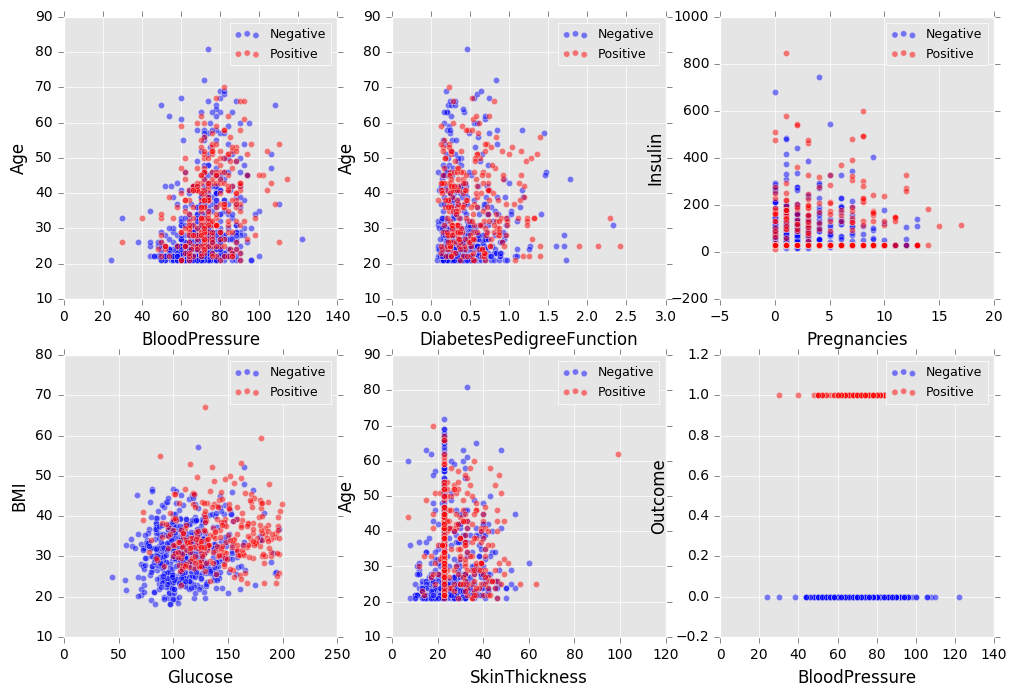

In [4]:
#We can plot some scatter plots to visualize the data

#get possible combinations of variables to plot
pairs = [(i,j) for i,j in itertools.combinations(X.columns,2)]
#now put the combinations in random order
random.shuffle(pairs)

#create figure
plt.figure(figsize=(12,8))
for i in range(0,6):
    #create subplot i+1
    plt.subplot(2,3,i+1)

    
    #plot the negative outcomes
    plt.scatter(X.loc[X['Outcome']==0,pairs[i][0]], X.loc[X['Outcome']==0,pairs[i][1]], alpha = 0.5, label = 'Negative')
    
    #plot the positive outcomes
    plt.scatter(X.loc[X['Outcome']==1,pairs[i][0]], X.loc[X['Outcome']==1, pairs[i][1]], alpha = 0.5, label = 'Positive', c= 'red')
    
    #create the legend
    plt.legend(fontsize = 9)
    
    #label the axes
    plt.xlabel(pairs[i][0],color = 'black'); plt.ylabel(pairs[i][1], color = 'black')
    
    #change the tick label color to black
    plt.tick_params(labelcolor= 'black')

### Logistic Regression with sklearn

In [57]:
#First convert X into a numpy array and store it in variable data
data = X.as_matrix()

#randomize the data order so that we grab a random chunck of data to train the algorithm with
np.random.shuffle(data)

#now put our independent variable data in Xb
Xb = data[:300,0:8]

#Store the outcomes in a vector called T
T = data[:300,8]

#define classification rate for when we predict outcomes
def classification_rate(Y,T):
    return np.mean(np.round(Y)==T)

In [58]:
#initialize our model as a Python object
model  = LogisticRegression()

#now fit the model to our data training sample
model.fit(Xb, T)

#display the parameters of our model
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
#generate test data to try to test our model
Xtest = data[300:,0:8]
Ttest = data[300:,8]

#now predict outcomes
Y = model.predict(Xtest)

#print the classification rate of our model
print('Test data classification rate: {}'.format(classification_rate(Y, Ttest)))

Test data classification rate: 0.75


### Manually Coded Logistic Regression

In [61]:
#First convert X into a numpy array and store it in variable data
data = X.as_matrix()

#randomize the data order so that we grab a random chunck of data to train the algorithm with
np.random.shuffle(data)

#now put our independent variable data in Xb
Xb = data[:300,0:8]

#Store the outcomes in a vector called T
T = data[:300,8]

#make sure that the vector is the proper shape
T.shape = (T.shape[0],1)

#We are going to call our logisitc regression weights w
#we will initialize our weights from a Normal (Gaussian) distribution
w = np.random.randn(8,1)

#define bias term
b = 0

In [62]:
#define our sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#define a function that returns the sigmoid of the weighted sum plus the bias
def forward(X,w,b):
    return sigmoid(X.dot(w) + b)

#define cross entropy function
def cross_entropy(Y,T):
    E = 0
    for i in range(0, T.size):
        if T[i] == 1:
            e = np.log(Y[i])
            if e == -np.inf:
                E -= 0
            else:
                E -= e
        else:
            e = np.log(1- Y[i])
            if e == -np.inf:
                E -=0
            else:
                E -=e
    return E


    
#define classification rate
def classification_rate(Y,T):
    return np.mean(np.round(Y)==T)

Cost value at iteration 0: [ 29423.14270017]
Cost value at iteration 100: [ 1869.30969611]
Cost value at iteration 200: [ 1789.19273211]
Cost value at iteration 300: [ 1685.4901431]
Cost value at iteration 400: [ 1641.28098591]
Cost value at iteration 500: [ 1443.84846869]
Cost value at iteration 600: [ 1355.8084594]
Cost value at iteration 700: [ 1411.320655]
Cost value at iteration 800: [ 1461.10965002]
Cost value at iteration 900: [ 1508.35973493]
Final Training Classification Rate: 0.656666666667


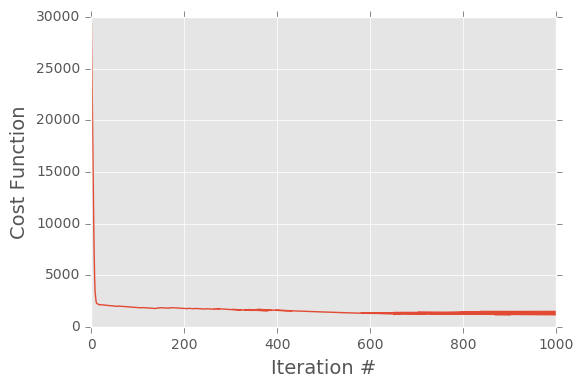

In [92]:
#now use define the learning rate for gradient descent
learning_rate = 1e-5

'''The gradient descent line can be expressed in the following ways:
Maximum Likelihood: w -= learning_rate*(Xb.T.dot(Y - T) )
L2 regularization:  w -= learning_rate*(Xb.T.dot(Y - T) + l2*w)
L1 regularization:  w -= learning_rate*(Xb.T.dot(Y - T) + l1*np.sign(w))'''
l2 = 1
l1 = 1e-3

#keep track of our cost function values 
costs = []

#now we train our model
for i in xrange(1000):
    
    #predict outputs
    Y = forward(Xb,w,b)
    
    #calculate the error in our prediction (cost)
    c = cross_entropy(Y,T)
    
    #append the cost to our list of costs
    costs.append(c)
    
    #update our weights with gradient descent
    w -= learning_rate*(Xb.T.dot(Y - T) + l2*w)
    
    #update our bias term  with gradient descent
    b -= learning_rate*(Y - T).sum()
    
    #these line print our cost values at every 100th iteration
    if i % 100 ==0:
        print('Cost value at iteration {}: {}'.format(i,costs[i]))
        

#now we will plot our cost function over each iteration of the training
plt.plot(costs)
plt.xlabel('Iteration #', fontsize= 14); plt.ylabel('Cost Function', fontsize = 14)

#print final training classification rate (proportion of correct classifications)
print('Final Training Classification Rate: {}'.format(classification_rate(Y,T)))

In [93]:
#display the final weights
print('The weights:\n')
for variable,weight in zip(X.columns, w):
    print('{}: {}'.format(variable,weight))
print '\nThe bias term:', b

The weights:

Pregnancies: [ 3.74890495]
Glucose: [ 0.20148073]
BloodPressure: [-0.96046976]
SkinThickness: [-0.3604678]
Insulin: [-0.06199544]
BMI: [ 1.31038222]
DiabetesPedigreeFunction: [ 0.52963865]
Age: [-0.05202809]

The bias term: -11.1115406924


In [94]:
#generate test data (a subset of our original dataset) to try to test our model
#if you want to shuffle the original data again before getting test data, add this line first: np.random.shuffle(data)
np.random.shuffle(data)
Xtest = data[300:,0:8]
Ttest = data[300:,8]

#test our data 
print('Test data classification rate: {}'.format(classification_rate(forward(Xtest,w,b),Ttest)))

Test data classification rate: 0.601906640368
